In [40]:
import pandas as pd

In [41]:
import seaborn as sns

In [42]:
from constants import *

In [43]:
import pylab

In [44]:
pareto_front_df = pd.read_csv('%s/arbor_stats.csv' % STATISTICS_DIR, skipinitialspace=True)
pareto_front_df

,arbor name,pareto front distance,pareto front location
0,087_1_C_day4,2.023706,1.00
1,084_2_C_day2,0.213441,1.00
2,043_5_S_day5,0.029891,0.88
3,093_1_C_day2,0.447800,1.00
4,078_1_C_day4,0.161652,0.61
...,...,...,...
7255,m248_1_C_noacc_day9,10.661093,0.11
7256,la1511_2_C_1acc_day9,1.791949,0.56
7257,m058_4_S_1acc_day9,4.505879,0.24
7258,m248_4_C_1acc_day9,7.464992,0.31


In [45]:
scaling_df = pd.read_csv('%s/scaling_distances.csv' % STATISTICS_DIR, skipinitialspace=True)
pareto_front_df = pd.merge(pareto_front_df, scaling_df)
pareto_front_df

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location
0,087_1_C_day4,2.023706,1.00,1.072667,0.83
1,084_2_C_day2,0.213441,1.00,1.036260,0.95
2,043_5_S_day5,0.029891,0.88,1.004686,0.88
3,093_1_C_day2,0.447800,1.00,1.057325,0.70
4,078_1_C_day4,0.161652,0.61,1.024057,0.61
...,...,...,...,...,...
7167,m248_1_C_noacc_day9,10.661093,0.11,1.145030,0.22
7168,la1511_2_C_1acc_day9,1.791949,0.56,1.099756,0.46
7169,m058_4_S_1acc_day9,4.505879,0.24,1.083096,0.24
7170,m248_4_C_1acc_day9,7.464992,0.31,1.120268,0.38


In [46]:
dist_column = 'pareto front scaling distance'
loc_column = 'pareto front scaling location'

In [47]:
CONDITIONS = {'S' : 'Salt', 'C': 'Control'}

In [48]:
metadata_df = pd.read_csv('%s/metadata.csv' % METADATA_DIR, skipinitialspace=True)
metadata_df['condition'] = metadata_df['condition'].map(CONDITIONS)
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition,hormone
0,PimpiBig4,103_4_S_day5,5,297,103,4,Salt,None
1,PimpiBig4,031_3_S_day5,5,278,031,3,Salt,None
2,PimpiBig4,055_2_S_day5,5,151,055,2,Salt,None
3,PimpiBig4,098_1_S_day5,5,14,098,1,Salt,None
4,PimpiBig4,101_1_S_day5,5,106,101,1,Salt,None
...,...,...,...,...,...,...,...,...
9790,PimpiBig6,053_1_C_day5,5,226,053,1,Control,None
9791,PimpiBig6,045_2_C_day5,5,227,045,2,Control,None
9792,PimpiBig6,045_3_S_day5,5,228,045,3,Salt,None
9793,PimpiBig6,053_2_S_day5,5,229,053,2,Salt,None


In [49]:
metadata_df = metadata_df[metadata_df['hormone'] != 'None']
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition,hormone
1382,PimpiGA,M248_1_C_noga_day5,5,1,M248,1,Control,noga
1383,PimpiGA,M248_2_C_noga_day5,5,2,M248,2,Control,noga
1384,PimpiGA,M248_3_C_noga_day5,5,3,M248,3,Control,noga
1385,PimpiGA,M248_4_C_noga_day5,5,4,M248,4,Control,noga
1386,PimpiGA,M248_5_C_noga_day5,5,5,M248,5,Control,noga
...,...,...,...,...,...,...,...,...
8742,PimpiACC,m058_6_C_1acc_day5,5,157,m058,6,Control,1acc
8743,PimpiACC,m058_7_C_1acc_day5,5,158,m058,7,Control,1acc
8744,PimpiACC,m058_8_C_1acc_day5,5,159,m058,8,Control,1acc
8745,PimpiACC,m058_9_C_1acc_day5,5,160,m058,9,Control,1acc


In [50]:
arbor_stats_df = pd.merge(pareto_front_df, metadata_df)
arbor_stats_df

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location,experiment,day,Picture #,genotype,replicate,condition,hormone
0,248_9_S_noiaa_day9,1.934651,0.93,1.089103,0.72,PimpiIAA1,9,46,248,9,Salt,noiaa
1,248_5_S_iaa_day9,11.208500,1.00,1.252299,0.36,PimpiIAA1,9,5,248,5,Salt,iaa
2,1511_4_S_iaa_day9,5.853187,0.88,1.085219,0.48,PimpiIAA1,9,122,1511,4,Salt,iaa
3,058_9_C_noiaa_day9,4.601898,0.89,1.086100,0.59,PimpiIAA1,9,116,058,9,Control,noiaa
4,1511_6_C_iaa_day5,0.364193,1.00,1.183724,1.00,PimpiIAA1,5,134,1511,6,Control,iaa
...,...,...,...,...,...,...,...,...,...,...,...,...
904,m248_1_C_noacc_day9,10.661093,0.11,1.145030,0.22,PimpiACC,9,89,m248,1,Control,noacc
905,la1511_2_C_1acc_day9,1.791949,0.56,1.099756,0.46,PimpiACC,9,136,la1511,2,Control,1acc
906,m058_4_S_1acc_day9,4.505879,0.24,1.083096,0.24,PimpiACC,9,128,m058,4,Salt,1acc
907,m248_4_C_1acc_day9,7.464992,0.31,1.120268,0.38,PimpiACC,9,145,m248,4,Control,1acc


<AxesSubplot:xlabel='hormone', ylabel='pareto front scaling location'>

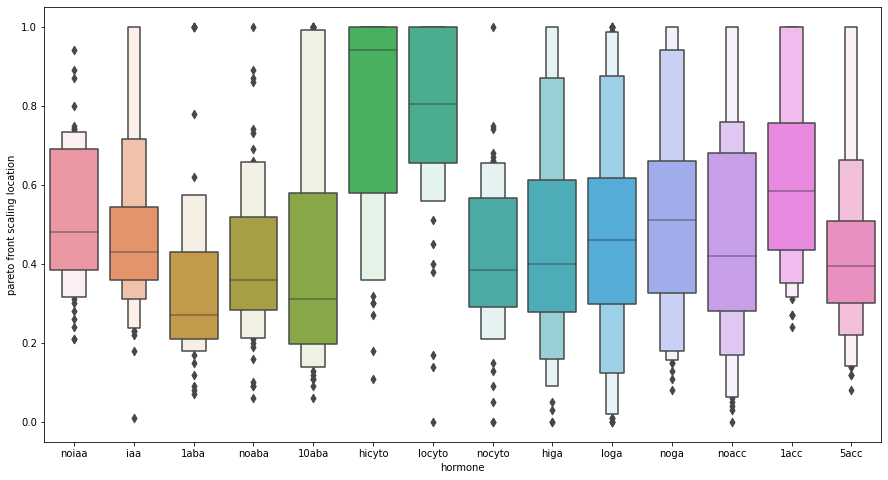

In [52]:
pylab.figure(figsize=(15,8))
sns.boxenplot(x='hormone', y=loc_column, data=arbor_stats_df)

<AxesSubplot:xlabel='hormone', ylabel='pareto front scaling location'>

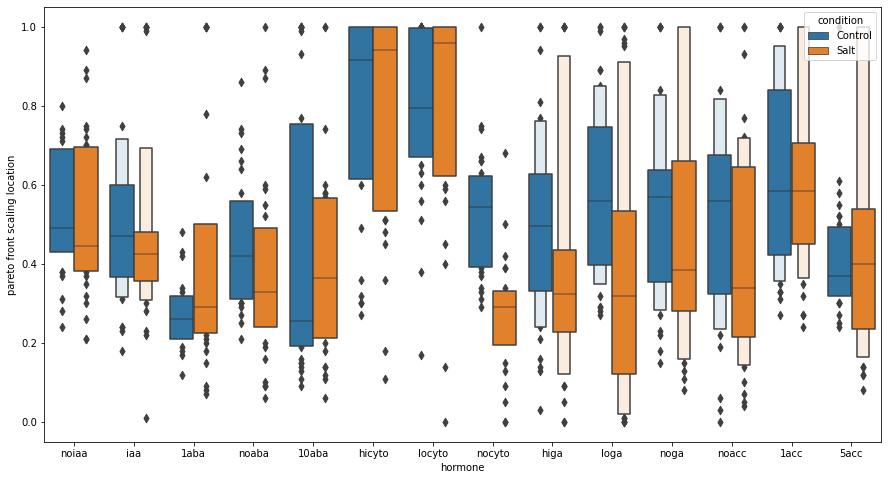

In [53]:
pylab.figure(figsize=(15,8))
sns.boxenplot(x='hormone', y=loc_column, hue='condition', data=arbor_stats_df, hue_order=['Control', 'Salt'])

<AxesSubplot:xlabel='hormone', ylabel='pareto front scaling distance'>

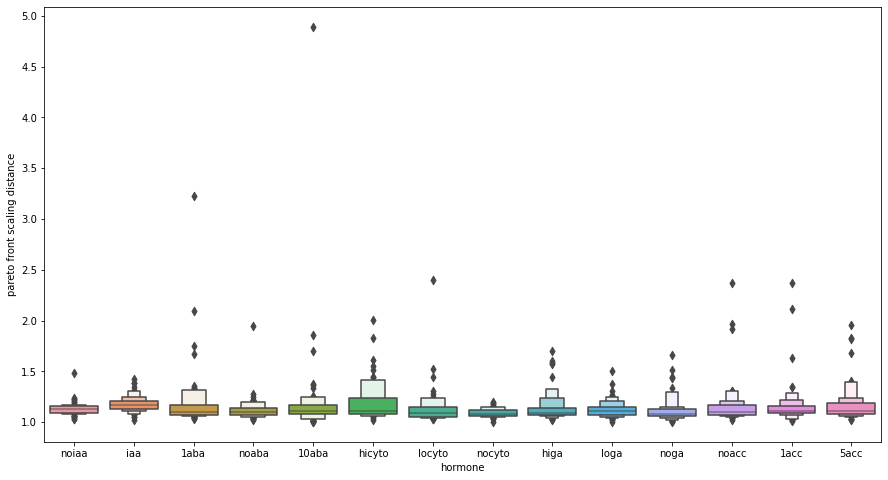

In [54]:
pylab.figure(figsize=(15,8))
sns.boxenplot(x='hormone', y=dist_column, data=arbor_stats_df)

<AxesSubplot:xlabel='hormone', ylabel='pareto front scaling distance'>

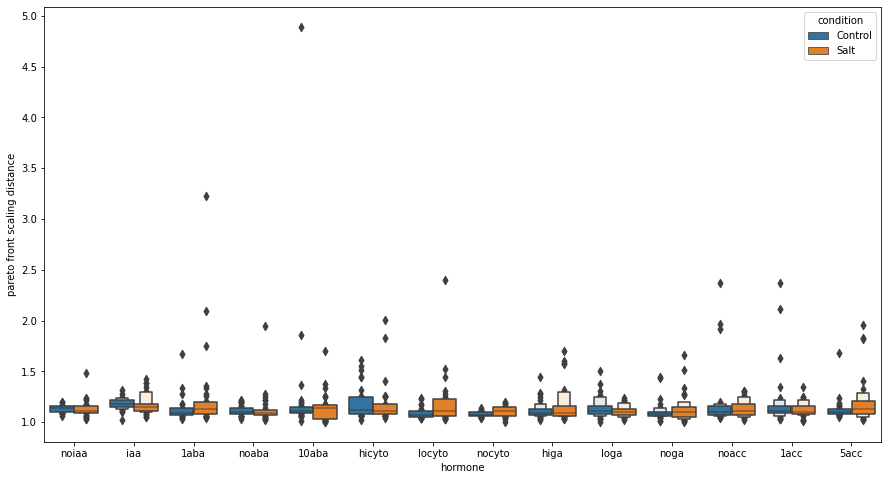

In [55]:
pylab.figure(figsize=(15,8))
sns.boxenplot(x='hormone', y=dist_column, hue='condition', data=arbor_stats_df, hue_order=['Control', 'Salt'])

In [56]:
from scipy.stats import mannwhitneyu

In [57]:
noiaa_control = arbor_stats_df[(arbor_stats_df['condition'] == 'Control') & (arbor_stats_df['hormone'] == 'noiaa')]['pareto front scaling distance']

In [58]:
noiaa_salt = arbor_stats_df[(arbor_stats_df['condition'] == 'Salt') & (arbor_stats_df['hormone'] == 'noiaa')]['pareto front scaling distance']

In [59]:
iaa_control = arbor_stats_df[(arbor_stats_df['condition'] == 'Control') & (arbor_stats_df['hormone'] == 'iaa')]['pareto front scaling distance']

In [60]:
iaa_salt = arbor_stats_df[(arbor_stats_df['condition'] == 'Salt') & (arbor_stats_df['hormone'] == 'iaa')]['pareto front scaling distance']

In [61]:
mannwhitneyu(noiaa_control, noiaa_salt)

MannwhitneyuResult(statistic=316.0, pvalue=0.16137304485851356)

In [62]:
mannwhitneyu(iaa_control, iaa_salt)

MannwhitneyuResult(statistic=547.0, pvalue=0.036362541741252634)

In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [64]:
arbor_stats_df['alpha'] = arbor_stats_df[loc_column]
md = smf.mixedlm("alpha ~ hormone*condition",
                 data=arbor_stats_df, groups=arbor_stats_df['hormone'])

In [65]:
mdf = md.fit()

/Users/arjunchandrasekhar/opt/anaconda3/envs/plant-architecture/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [66]:
print(mdf.summary())

                    Mixed Linear Model Regression Results
Model:                    MixedLM         Dependent Variable:         alpha   
No. Observations:         909             Method:                     REML    
No. Groups:               14              Scale:                      0.0606  
Min. group size:          50              Log-Likelihood:             -63.7680
Max. group size:          84              Converged:                  Yes     
Mean group size:          64.9                                                
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                            0.437    0.250  1.745 0.081 -0.054  0.927
hormone[T.1aba]                     -0.163    0.355 -0.459 0.646 -0.859  0.533
hormone[T.1acc]                      0.184    0.353  0.520 0.603 -0.509  

In [69]:
import scikit_posthocs as sp

In [70]:
sp.posthoc_mannwhitney(arbor_stats_df, val_col='alpha', group_col='hormone')

,10aba,1aba,1acc,5acc,hicyto,higa,iaa,locyto,loga,noaba,noacc,nocyto,noga,noiaa
10aba,1.000000e+00,6.465592e-01,8.516090e-06,1.696867e-01,6.509154e-08,1.939925e-01,5.892534e-03,1.109861e-08,1.017934e-01,3.509220e-01,1.781638e-01,4.530488e-01,1.492781e-02,1.913767e-03
1aba,6.465592e-01,1.000000e+00,1.060733e-09,8.103071e-03,3.092403e-10,1.208661e-02,1.061532e-05,5.364183e-11,1.636167e-03,2.178307e-02,1.245635e-02,3.911885e-02,2.364938e-04,2.658899e-06
1acc,8.516090e-06,1.060733e-09,1.000000e+00,1.891716e-06,6.429086e-04,6.373359e-05,3.673051e-04,1.410541e-05,1.213263e-03,1.441958e-06,1.085017e-03,4.121648e-06,1.890641e-02,7.710263e-02
5acc,1.696867e-01,8.103071e-03,1.891716e-06,1.000000e+00,1.208768e-08,7.544118e-01,5.589906e-02,5.362086e-11,2.464318e-01,7.465812e-01,4.989486e-01,7.442188e-01,4.912993e-02,3.098060e-03
hicyto,6.509154e-08,3.092403e-10,6.429086e-04,1.208768e-08,1.000000e+00,2.475384e-08,1.852565e-07,9.905495e-01,3.622748e-08,5.973863e-10,1.261316e-07,2.466033e-09,3.732032e-06,1.011272e-06
higa,1.939925e-01,1.208661e-02,6.373359e-05,7.544118e-01,2.475384e-08,1.000000e+00,1.844887e-01,3.226828e-10,4.874093e-01,5.357982e-01,7.032640e-01,5.149847e-01,1.323899e-01,1.914137e-02
iaa,5.892534e-03,1.061532e-05,3.673051e-04,5.589906e-02,1.852565e-07,1.844887e-01,1.000000e+00,1.880338e-10,8.042470e-01,3.919877e-02,4.623810e-01,4.990994e-02,5.876335e-01,9.391196e-02
locyto,1.109861e-08,5.364183e-11,1.410541e-05,5.362086e-11,9.905495e-01,3.226828e-10,1.880338e-10,1.000000e+00,6.547472e-10,5.868994e-12,2.569772e-09,7.787162e-12,3.976827e-08,9.919603e-09
loga,1.017934e-01,1.636167e-03,1.213263e-03,2.464318e-01,3.622748e-08,4.874093e-01,8.042470e-01,6.547472e-10,1.000000e+00,1.372337e-01,7.691931e-01,1.503982e-01,3.805141e-01,1.817034e-01
noaba,3.509220e-01,2.178307e-02,1.441958e-06,7.465812e-01,5.973863e-10,5.357982e-01,3.919877e-02,5.868994e-12,1.372337e-01,1.000000e+00,3.245013e-01,9.877059e-01,2.540563e-02,2.172754e-03
